In [1]:
pip install langchain_openai langchain_core langchain_community langgraph langchain-couchbase langgraph-checkpointer-couchbase

  Using cached langchain_openai-0.3.28-py3-none-any.whl.metadata (2.3 kB)
  Using cached langchain_community-0.3.27-py3-none-any.whl.metadata (2.9 kB)
  Using cached langgraph-0.6.3-py3-none-any.whl.metadata (6.8 kB)
  Using cached langchain_couchbase-0.4.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached langgraph_checkpointer_couchbase-1.0.6-py3-none-any.whl.metadata (6.4 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached jiter-0.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached langchain-0.3.27-py3-none-any.whl.metadata (7.8 kB)
  Using cached sqlalchemy-2.0.42-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.6 kB)
  Using cached aiohttp-3.12.15-cp313-cp313-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.10.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached httpx_sse-0.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached aiohappyeyeb

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [3]:
def node_one(state):
    print("Node One")
    return {"graph_state": state['graph_state'] + " Hello"} 

def node_two(state):
    print("Node Two")
    return {"graph_state": state['graph_state'] + " My name is Jake"} 

def node_three(state):
    print("Node Three")
    return {"graph_state": state['graph_state'] + " and I'm 31 years old"} 

In [4]:
import random
from typing import Literal

def node_decision(state) -> Literal["node_two", "node_three"]:
    user_input = state['graph_state']

    if random.random() < 0.5:

        return "node_two"
    
    return "node_three"

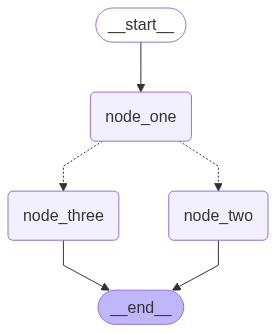

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# graph
builder = StateGraph(State)
builder.add_node("node_one", node_one)
builder.add_node("node_two", node_two)
builder.add_node("node_three", node_three)

# Logic
builder.add_edge(START, "node_one")
builder.add_conditional_edges("node_one", node_decision)
builder.add_edge("node_two", END)
builder.add_edge("node_three", END)

graph = builder.compile()

# To visualize the graph, can use mermaid diagrams
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"graph_state" : "I'm looking for a house"})

Node One
Node Three


{'graph_state': "I'm looking for a house Hello and I'm 31 years old"}